# Retrieving similar movies to a given movie. 

In [3]:
import pandas as pd
# Load the CSV file into a DataFrame
file_path = './wiki_movie_plots_deduped.csv'
df = pd.read_csv(file_path)

# Remove spaces in column names
df.columns = df.columns.str.replace(' ', '_')

print(df.columns)

# Specify the new file path and save the updated DataFrame
new_file_path = './my_movies.csv'
df.to_csv(new_file_path, index=False)


Index(['Release_Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki_Page', 'Plot'],
      dtype='object')


In [103]:
import pandas as pd
import matplotlib.pyplot as plt



movies_df = pd.read_csv('./wiki_movie_plots_deduped.csv',
                           usecols=['Release Year', 'Title', 'Plot', 'Genre'])

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Release Year  34886 non-null  int64 
 1   Title         34886 non-null  object
 2   Genre         34886 non-null  object
 3   Plot          34886 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


<Axes: ylabel='Genre'>

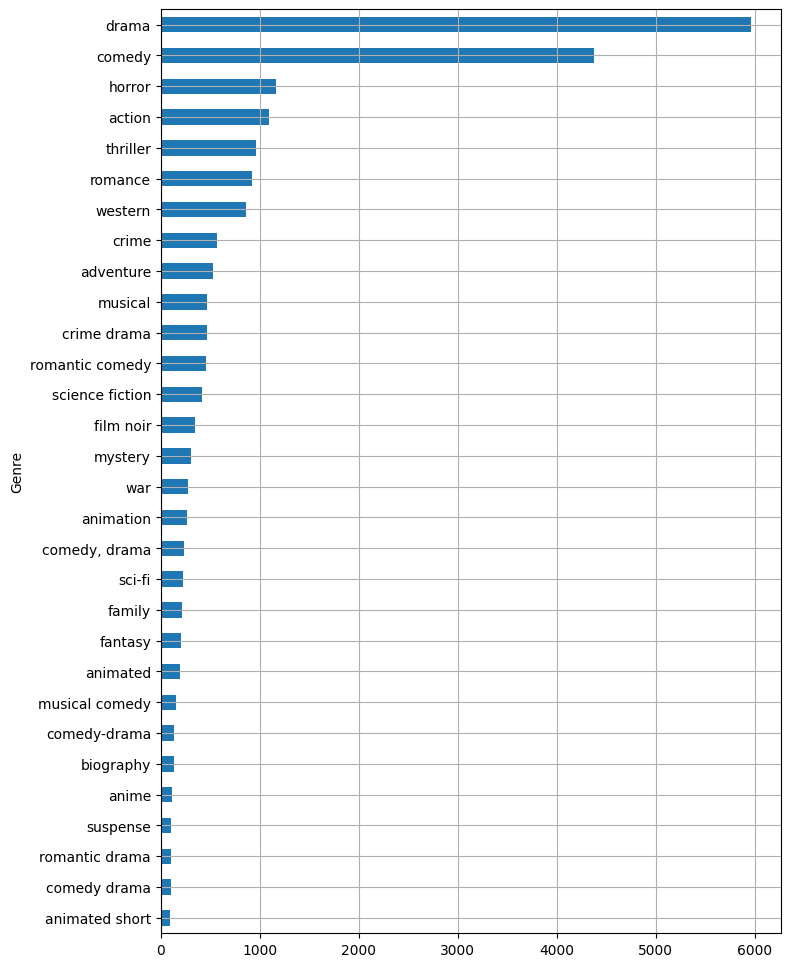

In [104]:
movies_df[movies_df["Genre"] != "unknown"].groupby(["Genre"]).size().sort_values(ascending=True).tail(30).plot.barh(figsize=(8, 12), grid=True)

In [105]:

# Check the number of rows and columns in the DataFrame
print("Number of rows:", movies_df.shape[0])
print("Number of columns:", movies_df.shape[1])

Number of rows: 34886
Number of columns: 4


In [106]:
def check_missing_values(df):
    # Count missing values in each column
    missing_values = df.isna().sum()

    # Calculate total missing values
    total_missing_values = missing_values.sum()
    
    # Calculate percentage of missing values
    percentage_missing_values = (total_missing_values / df.shape[0]) * 100

    # Return a dictionary with counts and percentages
    return {
        'Total missing values': total_missing_values,
        'Percentage missing values': percentage_missing_values
    }



In [107]:
# Print the results of the function
print(check_missing_values(movies_df))

{'Total missing values': 0, 'Percentage missing values': 0.0}


In [108]:
import certifi
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

print("Certificates installed successfully.")

Certificates installed successfully.


In [109]:
titles = movies_df["Title"]
# print(genres)

In [110]:
print(titles)

0                  Kansas Saloon Smashers
1           Love by the Light of the Moon
2                 The Martyred Presidents
3        Terrible Teddy, the Grizzly King
4                  Jack and the Beanstalk
                       ...               
34881                   The Water Diviner
34882                  Çalgı Çengi İkimiz
34883                        Olanlar Oldu
34884                    Non-Transferable
34885                  İstanbul Kırmızısı
Name: Title, Length: 34886, dtype: object


## Preprocessing steps

Below we have an example of word_tokenize and STOPWORDS result

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/annilamunsaf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


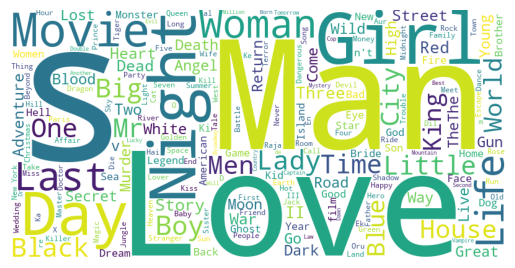

In [111]:
import nltk
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize

# Extract the movie plots
titles = movies_df["Title"]

# Remove stopwords from the plots
stop_words = set(STOPWORDS)

filtered_titles = []
for title in titles:
    words = word_tokenize(title)
    filtered_words = [word for word in words if word not in stop_words]
    filtered_titles.append(' '.join(filtered_words))
    
    # Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud
wordcloud.generate(' '.join(filtered_titles))

# Display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Below we show STOPWORDS, and WordNetLemmatizer result

In [112]:
import gensim
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')


def preprocess(text):
    result = []

    # Remove stopwords
    for token in gensim.utils.simple_preprocess(text):
        if token not in STOPWORDS:
            result.append(token)

    # Remove tokens shorter than 3 characters
    result = [token for token in result if len(token) > 2]

    # Lemmatize remaining tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token,pos='v') for token in result]

    return lemmatized_tokens

# Apply the preprocess function to the genres
preprocessed_documents = titles.map(preprocess)


preprocessed_documents.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/annilamunsaf/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0          [kansas, saloon, smashers]
1                 [love, light, moon]
2                [martyr, presidents]
3    [terrible, teddy, grizzly, king]
4                   [jack, beanstalk]
Name: Title, dtype: object

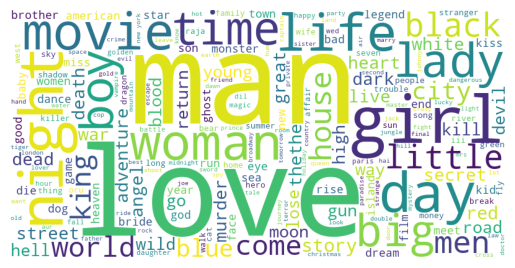

In [113]:

filtered_titles = []
for document in preprocessed_documents:
    filtered_words = [word for word in document]
    filtered_titles.append(' '.join(filtered_words))
    
    # Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud
wordcloud.generate(' '.join(filtered_titles))

# Display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [114]:
movies_df.head()

,Release Year,Title,Genre,Plot
0,1901,Kansas Saloon Smashers,unknown,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,unknown,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,unknown,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",unknown,Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,unknown,The earliest known adaptation of the classic f...


Here we apply directly to preprocess (Tokenize and remove stopwords, Remove tokens shorter than 3 characters, Lemmatize remaining tokens) movies_df ['Title'] and save it in movies_df['Preprocessed_title']

In [115]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess a list of words
def preprocess(text):
    
     # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in STOPWORDS]

    # Remove tokens shorter than 3 characters
    result = [token for token in filtered_tokens if len(token) > 2]

    # Lemmatize remaining tokens using WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = ' '.join([lemmatizer.lemmatize(token, pos='v') for token in result])

    return lemmatized_tokens

# Apply the preprocess function to the 'plot' column
movies_df['Preprocessed_titles'] = movies_df['Title'].apply(preprocess)


In [116]:
movies_df.head()

,Release Year,Title,Genre,Plot,Preprocessed_titles
0,1901,Kansas Saloon Smashers,unknown,"A bartender is working at a saloon, serving dr...",Kansas Saloon Smashers
1,1901,Love by the Light of the Moon,unknown,"The moon, painted with a smiling face hangs ov...",Love Light Moon
2,1901,The Martyred Presidents,unknown,"The film, just over a minute long, is composed...",Martyred Presidents
3,1901,"Terrible Teddy, the Grizzly King",unknown,Lasting just 61 seconds and consisting of two ...,Terrible Teddy Grizzly King
4,1902,Jack and the Beanstalk,unknown,The earliest known adaptation of the classic f...,Jack Beanstalk


## Retrieving and ranking movies

In [117]:
user_input = "Frozen"

Here we apply word2vec_model and cosine_similarity to see recommended movies

In [118]:
def generate_user_tokens(user_input_value):
    # Tokenize and filter out non-alphabetic tokens
    user_tokens = [token for token in word_tokenize(user_input_value.lower()) if token.isalpha()]
    return user_tokens

In [121]:
from sklearn.metrics.pairwise import cosine_similarity
import gensim.downloader
import gensim.models
import gensim.downloader as api
from sklearn.metrics import jaccard_score
from sklearn.metrics import pairwise_distances


# Load the pre-trained word embeddings from the extracted file
word2vec_model = api.load('word2vec-google-news-300')

user_input_processed_tokens = generate_user_tokens(user_input)


# Function to calculate cosine similarity between two sets of embeddings
def calculate_cosine_similarity(embeddings1, embedding_user_input):
    if embeddings1 is not None and embedding_user_input is not None:
        return cosine_similarity([embeddings1], [embedding_user_input])[0][0]
    else:
        return None
    
# Function to calculate Jaccard similarity between two sets of embeddings
def calculate_jaccard_similarity(embeddings1, embedding_user_input):
    if embeddings1 is not None and embedding_user_input is not None:
        # Convert embeddings to binary vectors (0 or 1)
        embeddings1_binary = (embeddings1 > 0).astype(int)
        embedding_user_input_binary = (embedding_user_input > 0).astype(int)

        # Calculate Jaccard similarity
        return jaccard_score(embeddings1_binary, embedding_user_input_binary, average="micro")
    else:
        return None
    
    
    
    
# Function to aggregate word embeddings for a lemmatized plot
def aggregate_embeddings(lemmatized_plot, model):
    tokens = lemmatized_plot.split()
    # Filter out tokens that are not in the vocabulary of the Word2Vec model
    valid_tokens = [token for token in tokens if token in model.key_to_index]

    # Return the mean of the word embeddings for the valid tokens
    if valid_tokens:
        embeddings = [model[token] for token in valid_tokens]
        aggregated_embedding = sum(embeddings) / len(embeddings)
        return aggregated_embedding
    else:
        return None
    
user_input_embedding = aggregate_embeddings(' '.join(user_input_processed_tokens), word2vec_model)
    
    


In [122]:
movies_df['title_embeddings'] = movies_df['Title'].apply(lambda lemmatized_plot: aggregate_embeddings(lemmatized_plot, word2vec_model))
movies_df['cosine_similarity'] = movies_df['title_embeddings'].apply(lambda embeddings: calculate_cosine_similarity(embeddings, user_input_embedding))
movies_df['jaccard_similarity'] = movies_df['title_embeddings'].apply(lambda embeddings: calculate_jaccard_similarity(embeddings, user_input_embedding))


In [124]:
movies_df.head()

,Release Year,Title,Genre,Plot,Preprocessed_titles,title_embeddings,cosine_similarity,jaccard_similarity
0,1901,Kansas Saloon Smashers,unknown,"A bartender is working at a saloon, serving dr...",Kansas Saloon Smashers,"[0.009114583, -0.105407715, -0.07409668, 0.112...",-0.006994,0.342282
1,1901,Love by the Light of the Moon,unknown,"The moon, painted with a smiling face hangs ov...",Love Light Moon,"[0.0120442705, 0.04178874, -0.023925781, 0.018...",0.130687,0.408451
2,1901,The Martyred Presidents,unknown,"The film, just over a minute long, is composed...",Martyred Presidents,"[0.026224772, 0.14746094, 0.14404297, 0.201171...",0.067601,0.324503
3,1901,"Terrible Teddy, the Grizzly King",unknown,Lasting just 61 seconds and consisting of two ...,Terrible Teddy Grizzly King,"[0.05747223, 0.0038757324, -0.020385742, 0.189...",0.096736,0.401869
4,1902,Jack and the Beanstalk,unknown,The earliest known adaptation of the classic f...,Jack Beanstalk,"[-0.006591797, 0.052734375, -0.14290364, 0.076...",0.073652,0.363636


In [125]:
# Sort the DataFrame based on 'cosine_similarity' in ascending order
movies_df_sorted = movies_df.sort_values(by='cosine_similarity', ascending=False)

# Retrieve the top 10 movies
top_10_movies = movies_df_sorted.head(10)

# Display the top 10 movies
top_10_movies[['Release Year', 'Title','Genre', 'Preprocessed_titles', 'cosine_similarity']]

,Release Year,Title,Genre,Preprocessed_titles,cosine_similarity
23659,2010,Frozen,romance,Frozen,0.636140
15834,2010,Frozen,horror,Frozen,0.636140
16517,2013,Frozen,"animated, fantasy, musical",Frozen,0.636140
16518,2013,"Frozen Ground, TheThe Frozen Ground",thriller,Frozen Ground TheThe Frozen Ground,0.550439
431,1922,The Frozen North,unknown,Frozen North,0.523478
11799,1992,Frozen Assets,comedy,Frozen Assets,0.517064
15440,2008,Frozen River,crime drama,Frozen River,0.462623
18525,1939,The Frozen Limits,comedy,Frozen Limits,0.431203
4026,1945,The Frozen Ghost,horror,Frozen Ghost,0.416553
16799,2014,Cold in July,crime drama,Cold July,0.289329


In [126]:
# Sort the DataFrame based on 'jaccard_similarity' in ascending order
movies_df_sorted = movies_df.sort_values(by='jaccard_similarity', ascending=False)

# Retrieve the top 10 movies
top_10_movies = movies_df_sorted.head(10)

# Display the top 10 movies
top_10_movies[['Release Year', 'Title','Genre', 'Preprocessed_titles', 'jaccard_similarity']]

,Release Year,Title,Genre,Preprocessed_titles,jaccard_similarity
16517,2013,Frozen,"animated, fantasy, musical",Frozen,0.574803
23659,2010,Frozen,romance,Frozen,0.574803
15834,2010,Frozen,horror,Frozen,0.574803
16518,2013,"Frozen Ground, TheThe Frozen Ground",thriller,Frozen Ground TheThe Frozen Ground,0.522843
15484,2008,Milk,biography,Milk,0.503759
431,1922,The Frozen North,unknown,Frozen North,0.496259
15440,2008,Frozen River,crime drama,Frozen River,0.481481
11799,1992,Frozen Assets,comedy,Frozen Assets,0.481481
18525,1939,The Frozen Limits,comedy,Frozen Limits,0.463415
12249,1994,Milk Money,comedy,Milk Money,0.463415


### Text indexing

In [127]:
from collections import defaultdict
def create_inverted_index(df):
    inverted_index = defaultdict(list)

    for idx, row in df.iterrows():
        preprocessed_plot = preprocess(row['Title'])
        tokens = word_tokenize(preprocessed_plot)
        
        for token in set(tokens):
            inverted_index[token].append(idx)

    return inverted_index

In [128]:
from collections import defaultdict
from nltk import ngrams, word_tokenize

def create_ngram_inverted_index(df, n=2):
    inverted_index = defaultdict(list)

    for idx, row in df.iterrows():
        preprocessed_title = preprocess(row['Title'])
        tokens = word_tokenize(preprocessed_title)

        # Generate n-grams from the tokens
        ngrams_list = list(ngrams(tokens, n))

        for ngram in set(ngrams_list):
            inverted_index[ngram].append(idx)

    return inverted_index

Applying technique='TF-IDF' on movies_df['Preprocessed_title']

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer

def calculate_similarity_with_tfid_cosine(user_input_value, movie_df):
    # Preprocess user input
    preprocessed_user_input = preprocess(user_input_value)

    # Preprocess movie plots
    movie_df['Preprocessed_title'] = movie_df['Title'].apply(preprocess)

    # Apply TF-IDF vectorization
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(movie_df['Preprocessed_title'])

    # Vectorize user input
    user_vector = vectorizer.transform([preprocessed_user_input])

    # Calculate cosine similarity
    similarity_scores = cosine_similarity(user_vector, tfidf_matrix).flatten()

    # Add similarity scores to the DataFrame
    similarity_column = f'Similarity (TF-IDF)'
    movie_df[similarity_column] = similarity_scores

    # Sort by similarity scores in descending order
    movie_df = movie_df.sort_values(by=similarity_column, ascending=False)

    return movie_df[['Release Year', 'Title','Genre', similarity_column, 'Preprocessed_title']]

In [130]:
result_df = calculate_similarity_with_tfid_cosine(user_input, movies_df)
result_df.head(10)

,Release Year,Title,Genre,Similarity (TF-IDF),Preprocessed_title
23659,2010,Frozen,romance,1.000000,Frozen
15834,2010,Frozen,horror,1.000000,Frozen
16517,2013,Frozen,"animated, fantasy, musical",1.000000,Frozen
4026,1945,The Frozen Ghost,horror,0.787386,Frozen Ghost
15440,2008,Frozen River,crime drama,0.782548,Frozen River
431,1922,The Frozen North,unknown,0.753330,Frozen North
18525,1939,The Frozen Limits,comedy,0.680868,Frozen Limits
16518,2013,"Frozen Ground, TheThe Frozen Ground",thriller,0.675891,Frozen Ground TheThe Frozen Ground
11799,1992,Frozen Assets,comedy,0.647877,Frozen Assets
23260,1989,Miracles,unknown,0.000000,Miracles


In [131]:
import numpy as np
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import CountVectorizer

def calculate_jaccard_similarity(user_vector, movie_vectors):
    # Convert sparse matrices to dense arrays
    user_array = user_vector.toarray().flatten()
    movie_array = movie_vectors.toarray()

    # Calculate Jaccard similarity
    intersection = np.sum(np.minimum(user_array, movie_array), axis=1)
    union = np.sum(np.maximum(user_array, movie_array), axis=1)
    jaccard_similarity = intersection / union

    return jaccard_similarity

def calculate_similarity_with_jaccard(user_input_value, movie_df):
    # Preprocess user input
    preprocessed_user_input = preprocess(user_input_value)

    # Preprocess movie titles
    movie_df['Preprocessed_title'] = movie_df['Title'].apply(preprocess)

    # Convert the preprocessed text into binary vectors (1 if the word is present, 0 otherwise)
    vectorizer = CountVectorizer(binary=True)
    user_vector = vectorizer.fit_transform([preprocessed_user_input])
    movie_vectors = vectorizer.transform(movie_df['Preprocessed_title'])

    # Calculate Jaccard similarity
    similarity_scores = calculate_jaccard_similarity(user_vector, movie_vectors)

    # Add similarity scores to the DataFrame
    similarity_column = 'Similarity (Jaccard)'
    movie_df[similarity_column] = similarity_scores

    # Sort by similarity scores in descending order
    movie_df = movie_df.sort_values(by=similarity_column, ascending=False)

    return movie_df[['Release Year', 'Title', 'Genre', similarity_column, 'Preprocessed_title']]



In [132]:
user_input = "Winie the Pooh"
result_df = calculate_similarity_with_jaccard(user_input, movies_df)
result_df.head(10)

,Release Year,Title,Genre,Similarity (Jaccard),Preprocessed_title
16145,2011,Winnie the Pooh,"animated, family",0.5,Winnie Pooh
13100,1997,Pooh's Grand Adventure: The Search for Christo...,"family, animated",0.5,Pooh Grand Adventure Search Christopher Robin
10161,1983,Winnie the Pooh and a Day for Eeyore,animation,0.5,Winnie Pooh Day Eeyore
9387,1977,The Many Adventures of Winnie the Pooh,animation,0.5,Adventures Winnie Pooh
13589,1999,Winnie the Pooh: Seasons of Giving,animation,0.5,Winnie Pooh Seasons Giving
8166,1966,Winnie the Pooh and the Honey Tree,animation,0.5,Winnie Pooh Honey Tree
14736,2005,Pooh's Heffalump Movie,animation,0.5,Pooh Heffalump Movie
23260,1989,Miracles,unknown,0.0,Miracles
23256,1989,In the Line of Duty 4: Witness,unknown,0.0,Line Duty Witness
23257,1989,Just Heroes,unknown,0.0,Heroes


### Get the first movie

In [133]:
selected_movie_title = result_df.iloc[0]["Title"]
print(selected_movie_title)

Winnie the Pooh


## Get the Genre of the selected movie

In [134]:
selected_movie_genre = movies_df.at[movies_df[movies_df["Title"] == selected_movie_title].index[0], "Genre"]
print(selected_movie_genre)

animated, family


In [135]:
# Use boolean indexing to filter movies with the specified partial genre
movies_genre_df = movies_df[movies_df["Genre"].str.contains(selected_movie_genre, case=False)]

movies_genre_df.head(20)




,Release Year,Title,Genre,Plot,Preprocessed_titles,title_embeddings,cosine_similarity,jaccard_similarity,Preprocessed_title,Similarity (TF-IDF),Similarity (Jaccard)
9390,1977,The Mouse and His Child,"animated, family",The mouse and his child are two parts of a sin...,Mouse Child,"[0.0057525635, 0.106933594, 0.009155273, 0.003...",0.089791,0.385681,Mouse Child,0.0,0.0
15815,2010,Despicable Me,"animated, family","Gru, a supervillain, is disheartened when an u...",Despicable,"[0.1550293, 0.12271118, -0.057617188, 0.004882...",0.023618,0.339286,Despicable,0.0,0.0
15944,2010,Tangled,"animated, family","Long ago, a drop of sunlight became a flower c...",Tangled,"[0.27734375, -0.125, -0.58984375, 0.0035705566...",0.051432,0.327434,Tangled,0.0,0.0
15980,2011,Arthur Christmas,"animated, family, fantasy","On Christmas Eve, hundreds of Christmas elves ...",Arthur Christmas,"[0.099487305, 0.045318604, -0.22851562, 0.0889...",0.097929,0.388889,Arthur Christmas,0.0,0.0
15994,2011,Cars 2,"animated, family, spy film","Finn McMissile, a British spy, infiltrates the...",Cars,"[0.15161133, 0.03955078, -0.018798828, 0.10815...",0.108604,0.395349,Cars,0.0,0.0
16030,2011,Gnomeo and Juliet,"animated, family","In Stratford-Upon-Avon, Miss. Montague (blue) ...",Gnomeo Juliet,"[0.096191406, -0.027832031, -0.48291016, 0.309...",0.031376,0.327434,Gnomeo Juliet,0.0,0.0
16038,2011,Happy Feet Two,"animated, family","Erik, son of the penguins Mumble and Gloria, i...",Happy Feet,"[0.012008667, -0.114746094, -0.04296875, 0.037...",0.052880,0.321586,Happy Feet,0.0,0.0
16045,2011,Hoodwinked Too! Hood vs. Evil,"animated, family","Wolf (Patrick Warburton), Granny (Glenn Close)...",Hoodwinked Hood Evil,"[0.17340088, 0.039245605, -0.043273926, 0.2663...",0.082214,0.369863,Hoodwinked Hood Evil,0.0,0.0
16064,2011,Kung Fu Panda 2,"animated, family","Lord Shen, the scion of a peacock clan that ru...",Kung Panda,"[0.022155762, 0.052383423, 0.17614746, 0.03784...",0.039417,0.376147,Kung Panda,0.0,0.0
16097,2011,Rango,"animated, family, western",A pet chameleon (Johnny Depp) becomes stranded...,Rango,"[0.18652344, -0.18945312, -0.5234375, 0.496093...",0.102870,0.372998,Rango,0.0,0.0


### Get similar movies based on genre with newest movies first

In [136]:
sorted_movies_by_year = movies_genre_df.sort_values(by='Release Year', ascending=False)

# Display the result
sorted_movies_by_year.head(10)

,Release Year,Title,Genre,Plot,Preprocessed_titles,title_embeddings,cosine_similarity,jaccard_similarity,Preprocessed_title,Similarity (TF-IDF),Similarity (Jaccard)
16677,2013,"Smurfs: The Legend of Smurfy Hollow, TheThe Sm...","animated, family","As the story begins, Hefty, Clumsy, and Panick...",Smurfs Legend Smurfy Hollow TheThe Smurfs Lege...,"[-0.0057896203, 0.08014788, -0.013950893, -0.0...",0.128287,0.357466,Smurfs Legend Smurfy Hollow TheThe Smurfs Lege...,0.0,0.0
16501,2013,Epic,"adventure, animated, family, fantasy-comedy","17 year old Mary Katherine, or M.K., moves in ...",Epic,"[0.10058594, -0.28515625, -0.28320312, -0.0649...",0.041992,0.327434,Epic,0.0,0.0
16491,2013,Despicable Me 2,"animated, family",A mysterious vehicle using a huge magnet steal...,Despicable,"[0.13899739, 0.046651203, -0.020670572, 0.0265...",0.043535,0.336303,Despicable,0.0,0.0
16381,2012,The Swan Princess Christmas,"animated, family, 3d",Princess Odette and Prince Derek are on their ...,Swan Princess Christmas,"[-0.0044555664, 0.081970215, -0.071866035, -0....",0.108017,0.363636,Swan Princess Christmas,0.0,0.0
16360,2012,Rise of the Guardians,"action-adventure, animated, family",Jack Frost awakens from a frozen pond with amn...,Rise Guardians,"[0.19466145, 0.13460286, -0.07454427, 0.036972...",0.021072,0.312910,Rise Guardians,0.0,0.0
16321,2012,Madagascar 3: Europe's Most Wanted,"animated, family","Many days after bidding the penguins goodbye, ...",Madagascar Europe Wanted,"[0.1233724, 0.069758095, -0.11735026, 0.017903...",0.136066,0.357466,Madagascar Europe Wanted,0.0,0.0
16319,2012,Dr. Seuss' The Lorax,"animated, family","Ted Wiggins is a 12-year-old, idealistic boy, ...",Dr. Seuss Lorax,"[0.048339844, 0.10746256, -0.013183594, -0.080...",-0.026231,0.345291,Dr. Seuss Lorax,0.0,0.0
16302,2012,Ice Age: Continental Drift,"animated, family",While Scrat inadvertently causes the break up ...,Ice Age Continental Drift,"[-0.14624023, -0.0009358724, -0.072143555, -0....",0.185959,0.415094,Ice Age Continental Drift,0.0,0.0
16145,2011,Winnie the Pooh,"animated, family",Winnie-the-Pooh wakes up one day to find that ...,Winnie Pooh,"[0.15364583, -0.023763021, -0.013020833, 0.113...",0.141999,0.369863,Winnie Pooh,0.0,0.5
16103,2011,Rio,"animated, family","In Brazil, various exotic birds are smuggled o...",Rio,"[-0.15136719, -0.16894531, 0.2421875, 0.277343...",-0.045898,0.345291,Rio,0.0,0.0
